# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Modelo machine learning Cluster - Churn Card</p></div>

![](https://img.freepik.com/vetores-gratis/conceito-de-protecao-dos-direitos-do-consumidor-a-definicao-de-direito-do-consumidor-e-o-direito-de-ter-informacoes-sobre-a-qualidade-potencia-quantidade-pureza-preco-e-padrao-de-bens-ou-servicos-vector-flat_1150-60891.jpg?t=st=1714415761~exp=1714419361~hmac=978b421119034f56dd06c8a15931eb21afffed3b5a57c9b1b2e5bd2758e97b28&w=1480)

# Problema de Negócio: Churn de Cartões de Crédito e Aplicação do Algoritmo K-means

O churn de cartões de crédito é um desafio crítico para as instituições financeiras, pois a perda de clientes pode impactar significativamente a receita e a lucratividade. Diante desse cenário, é fundamental compreender as causas subjacentes ao churn e desenvolver estratégias eficazes para reter os clientes.

Uma abordagem promissora para lidar com o churn de cartões de crédito é a aplicação de técnicas de clusterização, como o algoritmo K-means. O K-means é um algoritmo de aprendizado não supervisionado que agrupa os dados em clusters com base em características semelhantes, permitindo identificar grupos distintos de clientes com diferentes comportamentos de churn.

Ao aplicar o algoritmo K-means aos dados de churn de cartões de crédito, as instituições financeiras podem segmentar sua base de clientes em grupos homogêneos com base em padrões de comportamento, transações e interações passadas. Isso permite uma compreensão mais aprofundada dos fatores que contribuem para o churn e facilita o desenvolvimento de estratégias personalizadas de retenção de clientes para cada segmento.

A aplicação do algoritmo K-means no contexto do churn de cartões de crédito envolve várias etapas. Primeiramente, é necessário coletar e preparar os dados relevantes, incluindo informações sobre transações, históricos de pagamento, interações de atendimento ao cliente e outras variáveis pertinentes. Em seguida, o algoritmo K-means é aplicado aos dados para identificar os clusters de clientes com comportamentos semelhantes.

Uma vez que os clusters são identificados, é possível realizar uma análise mais aprofundada para entender as características distintivas de cada grupo em termos de probabilidade de churn. Isso pode incluir a identificação de padrões de gastos, frequência de uso do cartão, tendências de pagamento e outros fatores relevantes.

Com base nessa análise, as instituições financeiras podem desenvolver estratégias específicas de retenção de clientes para cada cluster, visando mitigar o churn e aumentar a fidelidade do cliente. Isso pode envolver a oferta de incentivos personalizados, programas de fidelidade, melhorias nos serviços oferecidos e outras iniciativas direcionadas.

Em resumo, a aplicação do algoritmo K-means no contexto do churn de cartões de crédito oferece uma abordagem poderosa e eficaz para compreender e abordar esse desafio empresarial crítico. Ao identificar padrões de comportamento e segmentar a base de clientes em grupos homogêneos, as instituições financeiras podem tomar decisões mais informadas e desenvolver estratégias de retenção de clientes mais eficazes.longo prazo.

In [1]:
# Bibliotecas sistema
import re
import os
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 
import pandas

# Visualização de dados
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuração para os gráficos largura e layout dos graficos
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Versão python neste Jupyter Notebook: 3.11.5
Author: Versões das bibliotecas

watermark : 2.4.3
matplotlib: 3.7.1
re        : 2.2.1
seaborn   : 0.12.2
plotly    : 5.9.0
numpy     : 1.24.3
pandas    : 1.5.3



# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>1.</b>Base dados</p></div>

- **CLIENTNUM:** Número de identificação único para cada cliente.
- **Attrition_Flag:** Indica se o cliente cancelou o cartão de crédito (churn). Pode ter valores como "Existing Customer" (Cliente Existente) ou "Attrited Customer" (Cliente Cancelado).
- **Customer_Age:** Idade do cliente.
- **Gender:** Gênero do cliente.
- **Dependent_count:** Número de dependentes do cliente.
- **Education_Level:** Nível de educação do cliente.
- **Marital_Status:** Estado civil do cliente.
- **Income_Category:** Categoria de renda do cliente.
- **Card_Category:** Categoria do cartão de crédito (por exemplo, "Blue", "Silver", "Gold", "Platinum").
- **Months_on_book:** Número de meses desde que o cliente abriu a conta.
- **Total_Relationship_Count:** Número total de produtos bancários que o cliente possui.
- **Months_Inactive_12_mon:** Número de meses em que o cliente esteve inativo nos últimos 12 meses.
- **Contacts_Count_12_mon:** Número de contatos que o cliente teve com a instituição nos últimos 12 meses.
- **Credit_Limit:** Limite de crédito do cliente.
- **Total_Revolving_Bal:** Saldo total de crédito rotativo do cliente.
- **Avg_Open_To_Buy:** Média do valor disponível para compra.
- **Total_Amt_Chng_Q4_Q1:** Mudança percentual no valor da transação do último trimestre para o primeiro trimestre.
- **Total_Trans_Amt:** Valor total das transações feitas pelo cliente.
- **Total_Trans_Ct:** Total de transações feitas pelo cliente.
- **Total_Ct_Chng_Q4_Q1:** Mudança percentual no número de transações do último trimestre para o primeiro trimestre.
- **Avg_Utilization_Ratio:** Razão média de utilização do crédito.
- **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:** Valor derivado do modelo de Naive Bayes para prever o churn (não utilizado para análise).
- **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2:** Outro valor derivado do modelo de Naive Bayes para prever o churn (não utilizado para análise).

In [2]:
# Base dados

# Definir opções do Pandas para exibir todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Base dados
data = pd.read_csv("credit_card_churn.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Visualizando 5 primeiros dados
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# Visualizando 5 últimos dados
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [5]:
# Linhas e colunas
data.shape

(10127, 23)

In [6]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
# Tipo dados
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>2. </b>Análise dados</p></div>


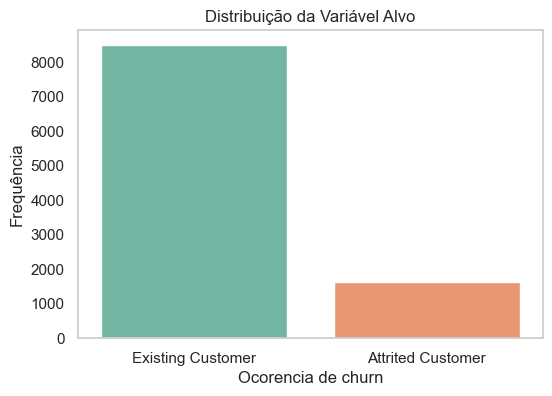

In [8]:
# Distribuição de frequência da variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(data, x='Attrition_Flag', palette='Set2')
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Ocorencia de churn')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

**Análise:** Aqui, essa variável representa as colunas, como churn e não churn, que são essenciais como atributos para treinar um modelo de machine learning. A coluna alvo, neste contexto, refere-se à variável que o modelo tentará prever ou classificar, como churn, que é crucial para a análise e previsão de comportamento de clientes.

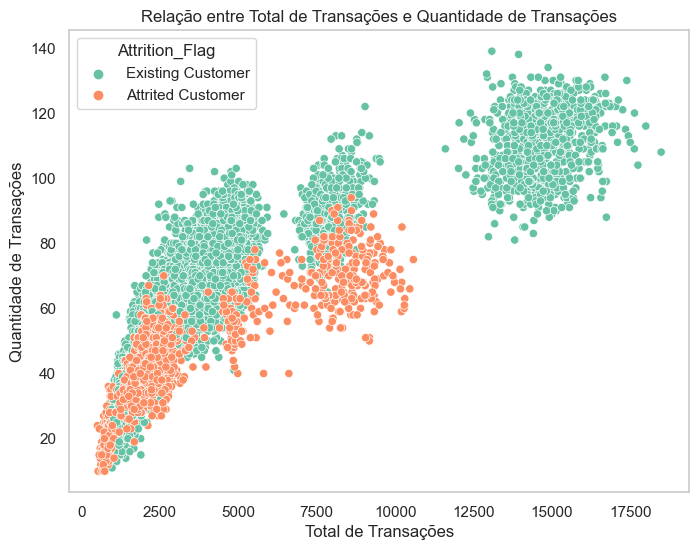

In [9]:
# Análise de Correlação Específica
# Correlação entre Total_Trans_Amt e Total_Trans_Ct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag', palette='Set2')
plt.title('Relação entre Total de Transações e Quantidade de Transações')
plt.xlabel('Total de Transações')
plt.ylabel('Quantidade de Transações')
plt.grid(False)
plt.show()

**Análise:** Neste gráfico, é apresentada a relação entre o total de transações realizadas pelos clientes, permitindo visualizar a posição do churn em relação a essa métrica. Essa representação gráfica oferece insights valiosos sobre como o comportamento transacional dos clientes está relacionado ao churn, possibilitando a identificação de padrões e tendências que podem influenciar estratégias de retenção e engajamento.

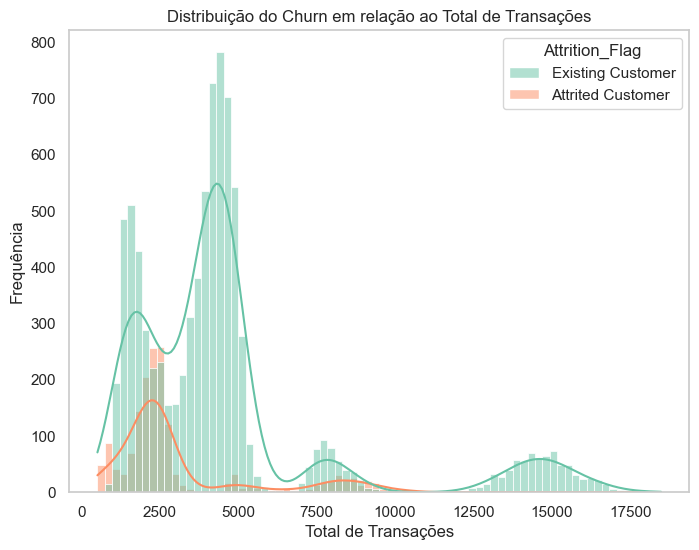

In [10]:
# Distribuição do Churn em relação ao Total de Transações
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Total_Trans_Amt', hue='Attrition_Flag', kde=True, palette='Set2')
plt.title('Distribuição do Churn em relação ao Total de Transações')
plt.xlabel('Total de Transações')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

**Análise**: Neste gráfico, são destacadas as transações de churn, totalizando 5000 casos registrados de churn no cartão de crédito. Essa análise revela a magnitude do churn no contexto das transações financeiras, fornecendo insights valiosos sobre a frequência e o impacto dessas ocorrências. Além disso, sugere a necessidade de estratégias direcionadas para retenção de clientes e mitigação do churn, visando a estabilidade e o crescimento sustentável do negócio.

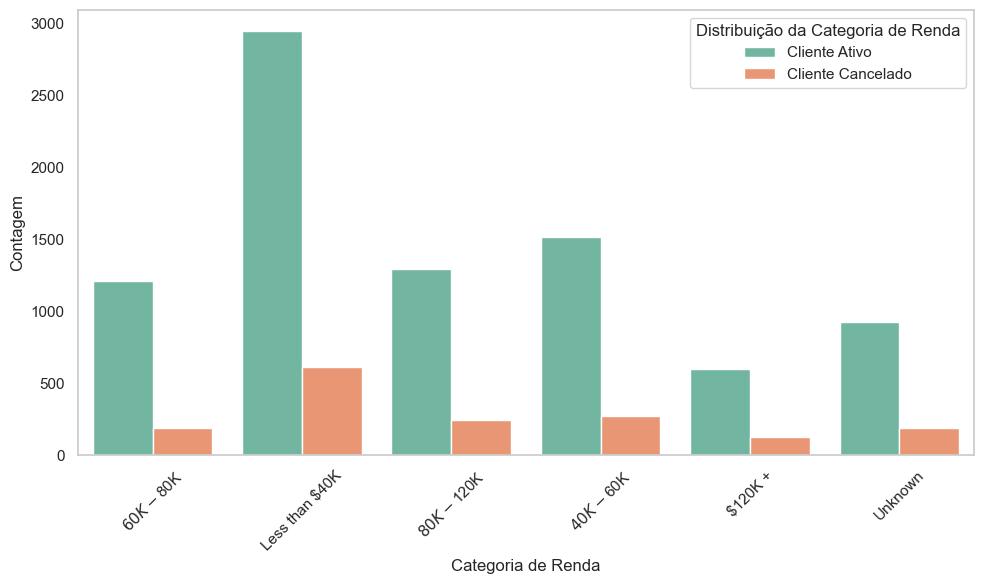

In [11]:
# Visualização da Distribuição da Categoria de Renda
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Income_Category', hue='Attrition_Flag', palette='Set2')
plt.xlabel('Categoria de Renda')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Distribuição da Categoria de Renda', loc='upper right', labels=['Cliente Ativo', 'Cliente Cancelado'])
plt.tight_layout()
plt.grid(False)
plt.show()

A distribuição da categoria de renda é uma representação que ilustra como a renda dos indivíduos está distribuída em diferentes categorias. Geralmente apresentado em forma de gráfico, este tipo de análise permite entender a composição da população com base em sua capacidade financeira.

Ao examinar essa distribuição, é possível identificar os diferentes estratos sociais e econômicos presentes em uma determinada amostra. Por exemplo, pode-se observar se a maioria dos indivíduos se enquadra em categorias de baixa, média ou alta renda, e qual a proporção de cada grupo em relação ao total da população analisada. Essa análise é valiosa para entender a demografia de uma região, orientar políticas públicas e estratégias de negócios, além de ser fundamental para segmentar o mercado e direcionar campanhas de marketing de forma mais eficaz. A distribuição da categoria de renda fornece insights valiosos sobre o poder de compra e o padrão de consumo de uma determinada população, auxiliando na tomada de decisões estratégicas em diversos setores.

**Análise:** Este gráfico, podemos observar que há 3.000 clientes com renda ativa que mantêm o cartão de crédito, indicando que não houve churn nesse grupo. No entanto, em outra barra, identificamos que 100 clientes cancelaram o cartão. Essa análise oferece insights importantes sobre a retenção de clientes e a saúde da base de usuários do cartão de crédito. Além disso, sugere a necessidade de investigar os motivos que levaram ao cancelamento e implementar estratégias para reduzir a taxa de churn, garantindo a satisfação e fidelização dos clientes.


Taxa de Ativação de Novos Clientes:
0.0


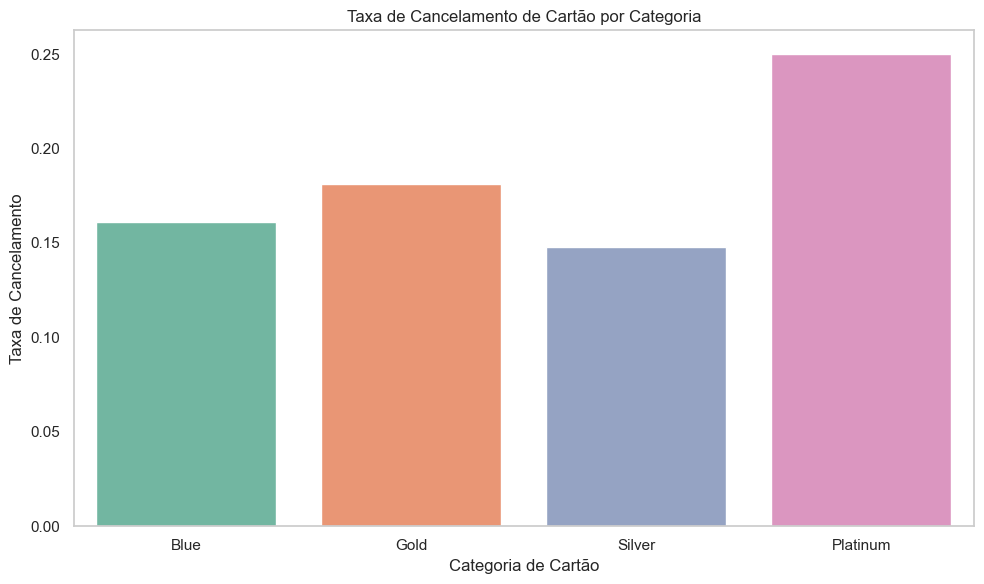

In [12]:
# 2. Taxa de Ativação de Novos Clientes
new_customers = data[data['Months_on_book'] == 1]['CLIENTNUM'].nunique()
total_customers = data['CLIENTNUM'].nunique()
activation_rate = (new_customers / total_customers) * 100
print("\nTaxa de Ativação de Novos Clientes:")
print(activation_rate)

# 2. Taxa de Cancelamento de Cartão por Categoria
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Card_Category'], palette='Set2', ci=None, y=data['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0}))
plt.title('Taxa de Cancelamento de Cartão por Categoria')
plt.xlabel('Categoria de Cartão')
plt.ylabel('Taxa de Cancelamento')
plt.tight_layout()
plt.grid(False)
plt.show()

Neste gráfico, é apresentada a distribuição dos casos de churn em diferentes categorias de cartão de crédito. Observa-se que diversas categorias estão representadas, cada uma com sua respectiva incidência de churn. Um destaque notável é a categoria "Blue", que apresenta um maior número de casos de churn em comparação com outras categorias. Essa observação levanta questões sobre os fatores que podem estar contribuindo para essa tendência, como a qualidade do serviço oferecido, os benefícios associados ao cartão ou até mesmo a experiência geral do cliente. Além disso, sugere a necessidade de uma análise mais detalhada para identificar possíveis pontos de melhoria e implementar estratégias específicas para reduzir a taxa de churn nessa categoria. Essa abordagem orientada por dados é fundamental para garantir a satisfação do cliente e promover a fidelização em todas as categorias de cartão de crédito.

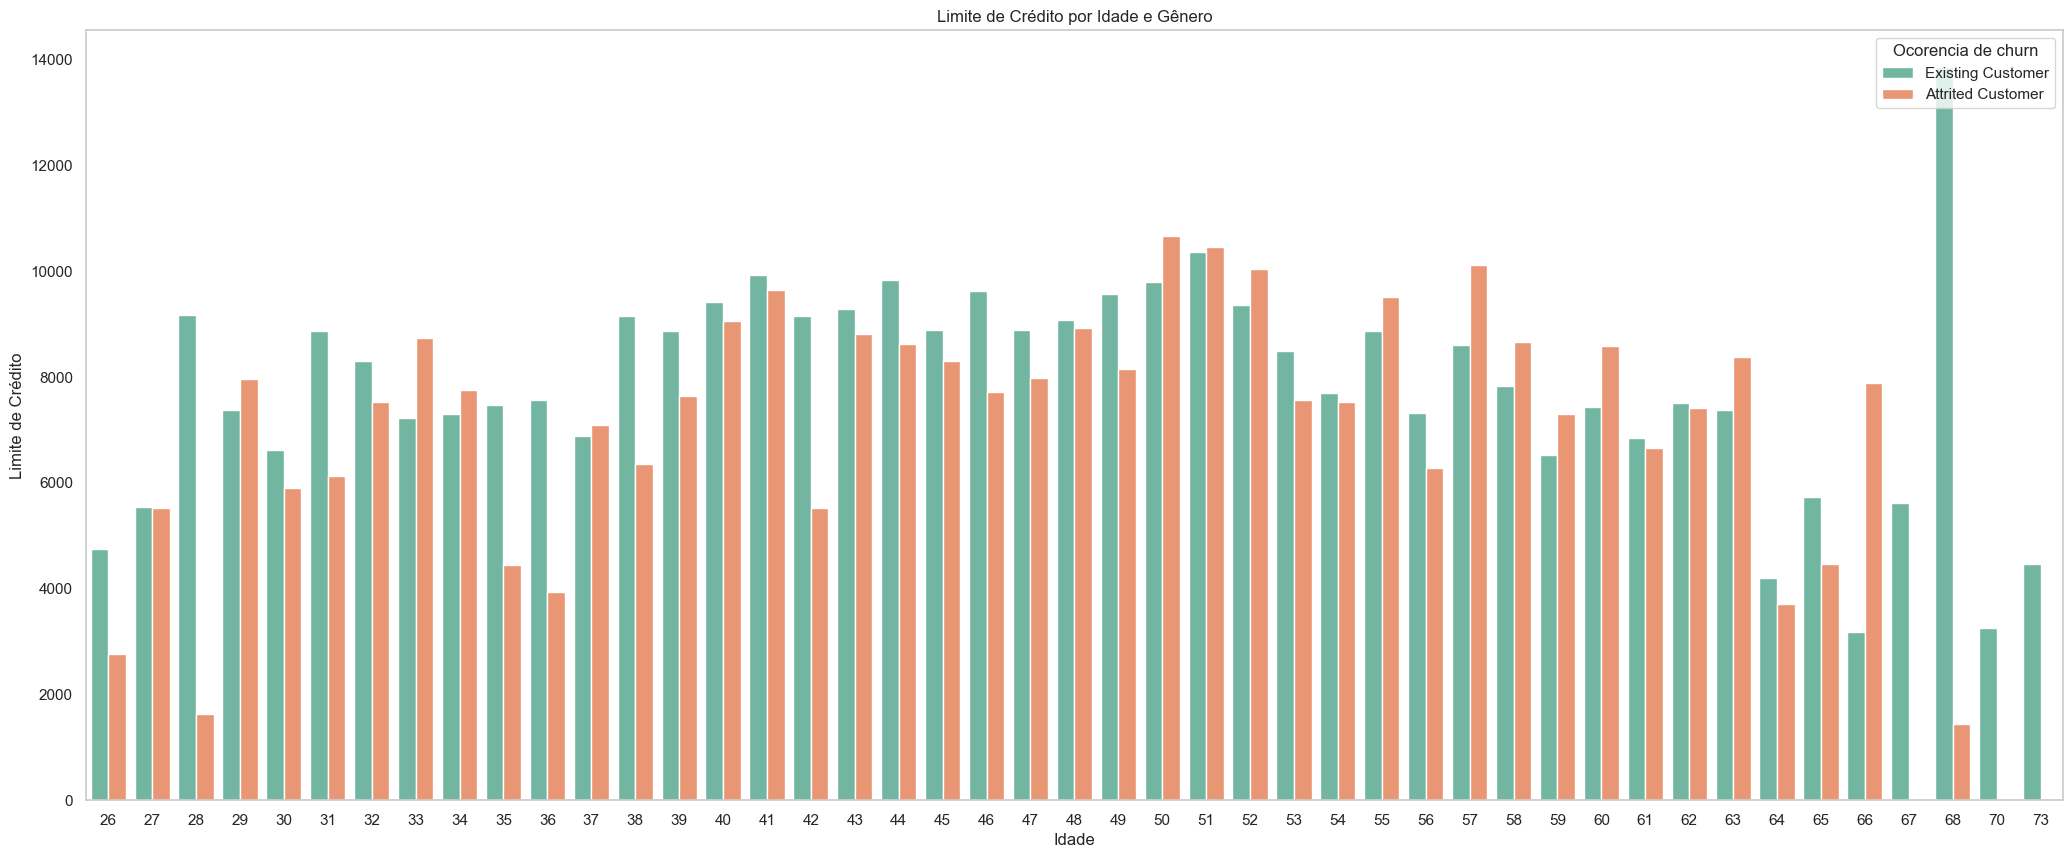

In [13]:
# Criar o gráfico de barras
plt.figure(figsize=(25.5, 10))
sns.barplot(data=data, x='Customer_Age', y='Credit_Limit', hue='Attrition_Flag', ci=None, palette='Set2')

# Adicionar título e rótulos dos eixos
plt.title('Limite de Crédito por Idade e Gênero')
plt.xlabel('Idade')
plt.ylabel('Limite de Crédito')

# Adicionar legenda
plt.legend(title='Ocorencia de churn', loc='upper right')

# Exibir o gráfico
plt.grid(False)
plt.show()

**Análise:** Neste gráfico, apresentamos a distribuição das idades dos clientes que cancelaram o cartão de crédito. Observamos uma variabilidade significativa nas idades dos clientes que optaram pelo cancelamento do serviço. Essa análise nos permite compreender melhor o perfil demográfico dos clientes que decidem cancelar seus cartões, fornecendo insights valiosos sobre possíveis padrões ou tendências. Além disso, sugere a importância de uma abordagem segmentada para a retenção de clientes, levando em consideração as diferentes faixas etárias e necessidades específicas de cada grupo, visando reduzir a taxa de churn e promover a fidelização.

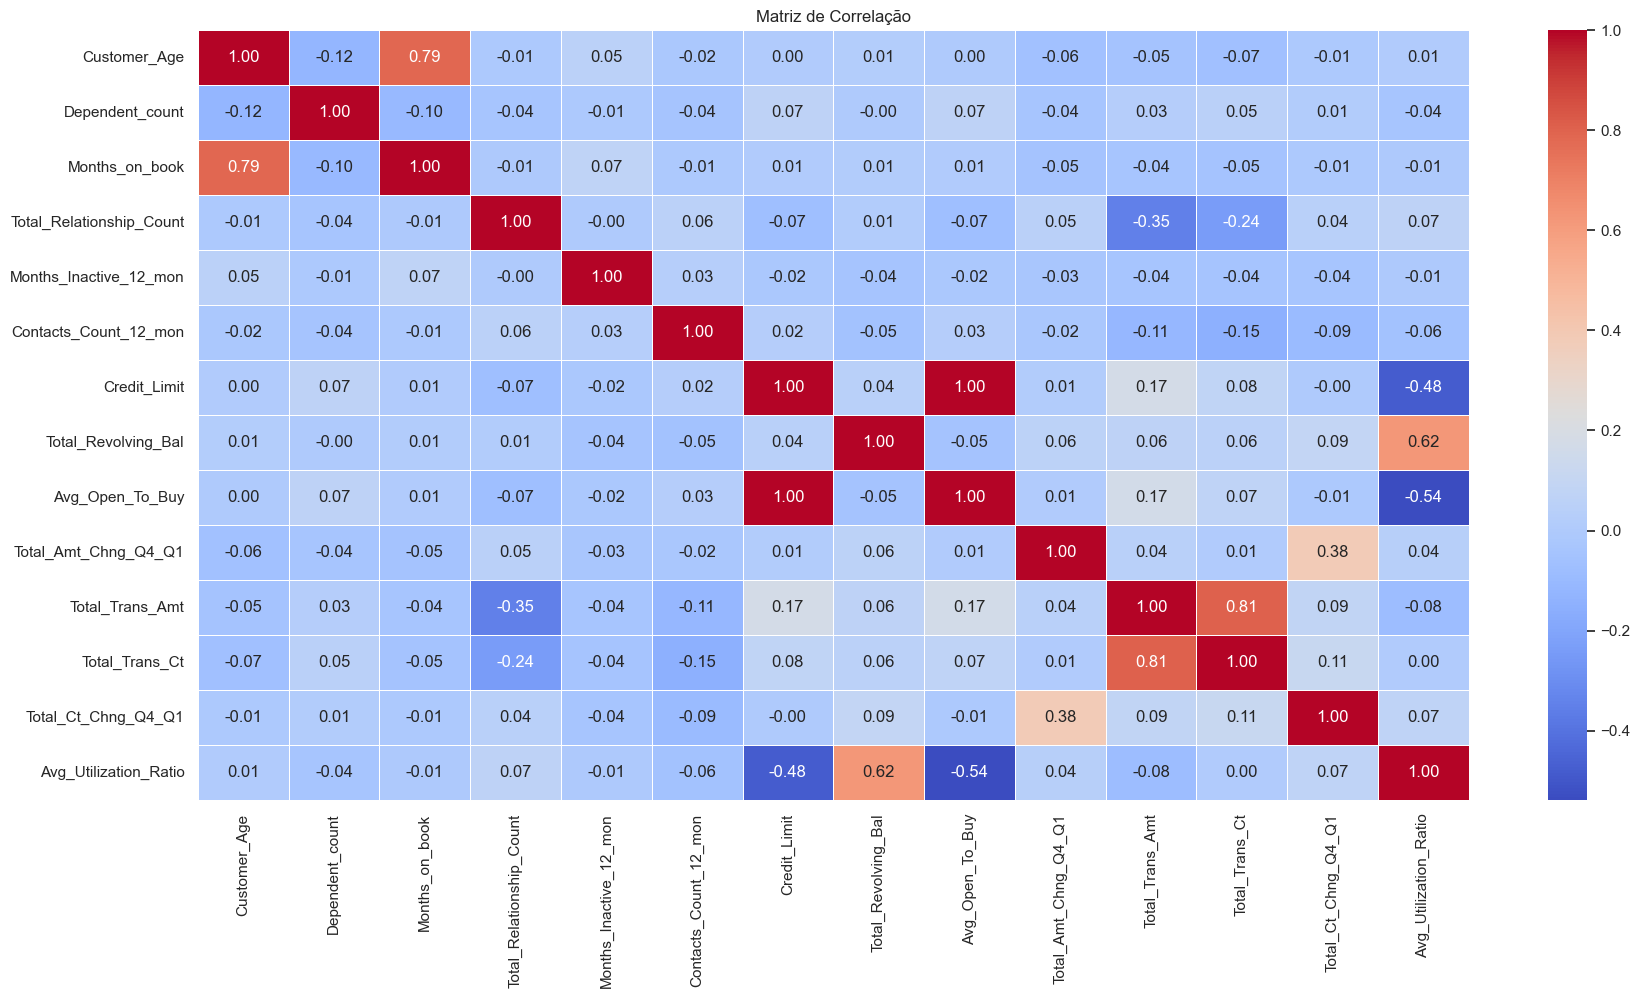

In [14]:
# Análise de Correlação

# Variaveis para correlação
data_corr = data[["Attrition_Flag", "Customer_Age", "Gender", "Dependent_count", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal","Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]]

# Plot correlation matrix
correlation_matrix = data_corr.corr()
plt.figure(figsize=(20.5, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

O total de transações, o saldo rotativo total e a mudança total no número têm uma correlação negativa moderada com o alvo. Isso faz total sentido. Quanto menos transações um cliente faz, mais provável é que ele cancele. Além disso, clientes com saldos rotativos mais baixos e menos variação em seus números de transações são propensos a cancelar devido à inatividade. 

A idade do cliente e os meses de permanência no livro estão fortemente correlacionados positivamente. Quanto mais velho é um cliente, mais tempo ele passa consumindo os serviços de cartão de crédito do banco e vice-versa. Assim, a empresa deve concentrar seus esforços em manter os clientes antigos e leais e aumentar a permanência dos mais jovens. O limite de crédito e a taxa média de utilização estão moderadamente correlacionados negativamente. Quanto maior o limite de crédito do cliente, menor é a taxa média de utilização. O saldo rotativo total e a taxa média de utilização estão fortemente correlacionados positivamente. Isso faz sentido. 

À medida que um cliente usa mais seu cartão de crédito, ele terá que pagar saldos rotativos mais altos. Curiosamente, o gênero tem uma correlação positiva moderada com o limite de crédito. Isso pode indicar que os clientes do sexo masculino tendem a ter limites de crédito mais altos do que os do sexo feminino. Algumas características que estão naturalmente relacionadas são altamente correlacionadas, como esperado. Este é o caso do valor total da transação e do total de transações. 

Ao construir modelos lineares, devemos nos preocupar com problemas de multicolinearidade, que ocorrem quando duas ou mais variáveis independentes estão altamente correlacionadas. Embora seja diagnosticado com o fator de inflação da variância, observar a correlação de Pearson entre pares pode nos indicar esse problema. Este é o caso aqui. No entanto, uma vez que vou me concentrar no poder preditivo, usando algoritmos mais robustos como o LightGBM, não me preocuparei com isso agora. Curiosamente, o valor médio aberto para comprar e o limite de crédito estão perfeitamente correlacionados positivamente. 

Isso significa que essas duas variáveis têm um relacionamento linear forte e consistente na mesma direção. Isso faz sentido, já que "aberto para comprar" significa o valor restante em seu cartão de crédito para usar e o limite significa o valor usado que ainda não foi pago. Como apresentam essa correlação perfeita, uma delas se torna redundante. Assim, vou descartar o "avg_open_to_buy" na etapa de modelagem porque o "credit_limit" é mais informativo.

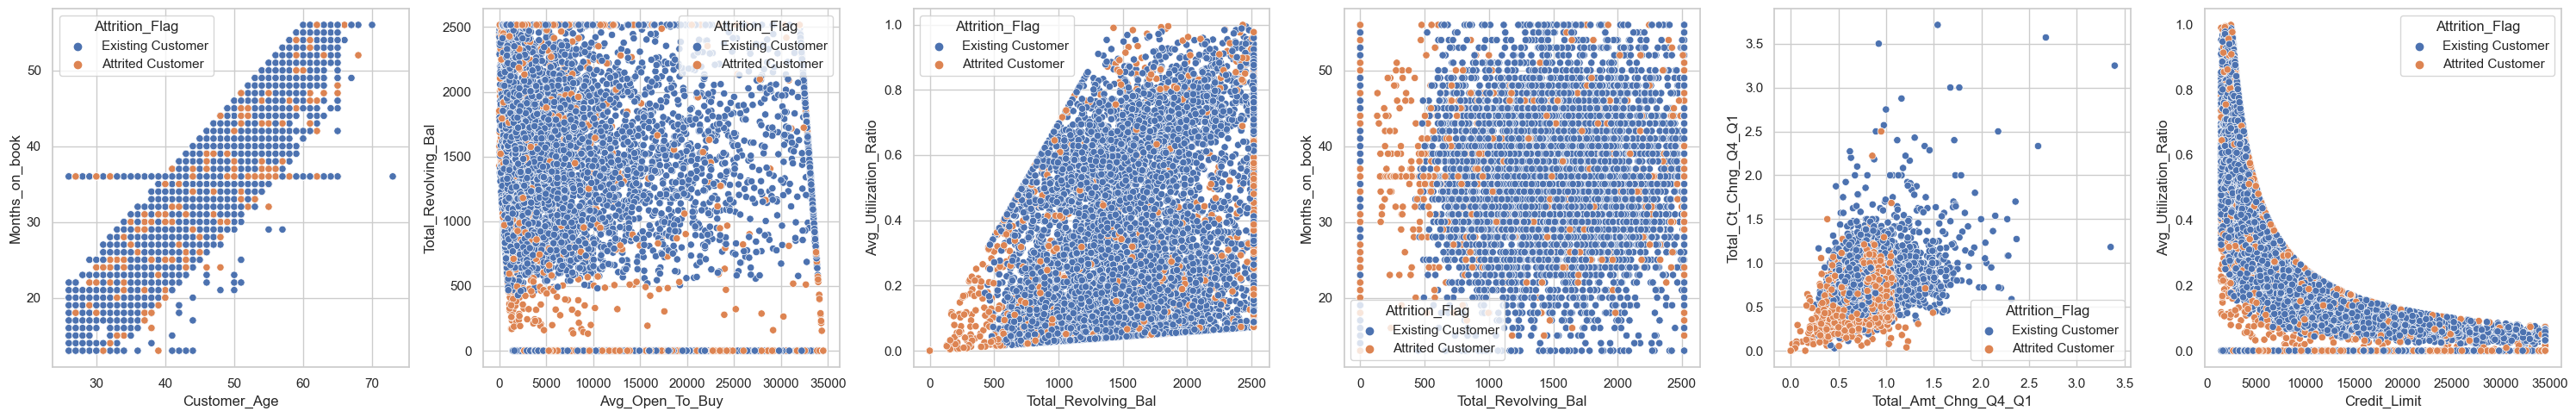

In [15]:
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

sns.scatterplot(data=data, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', ax=axes[0])
sns.scatterplot(data=data, x='Avg_Open_To_Buy', y='Total_Revolving_Bal',  hue='Attrition_Flag', ax=axes[1])
sns.scatterplot(data=data, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio',  hue='Attrition_Flag', ax=axes[2])
sns.scatterplot(data=data, x='Total_Revolving_Bal', y='Months_on_book',  hue='Attrition_Flag', ax=axes[3])
sns.scatterplot(data=data, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1',  hue='Attrition_Flag', ax=axes[4])
sns.scatterplot(data=data, x='Credit_Limit', y='Avg_Utilization_Ratio',  hue='Attrition_Flag', ax=axes[5])
plt.tight_layout()
plt.grid(False)
plt.show()

Curiosamente, o limite de crédito e a taxa média de utilização apresentam uma relação de decrescimento exponencial! Isso indica que, à medida que o limite de crédito aumenta, a taxa média de utilização diminui em uma taxa exponencial. 

Portanto, clientes com limites de crédito mais altos usam seus cartões de crédito menos frequentemente. Essa dinâmica sugere que existe uma relação não linear entre o limite de crédito e o uso do cartão, com uma diminuição mais acentuada na taxa de utilização à medida que o limite de crédito aumenta. Isso pode ser um insight valioso para o banco entender os padrões de gastos de seus clientes e ajustar suas estratégias de gerenciamento de crédito e retenção de clientes.

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>3. </b>Pré-processamento</p></div>

Pré-processamento em Python refere-se às etapas de preparação e limpeza de dados antes de aplicar modelos de machine learning ou análise estatística. Essas etapas são essenciais para garantir que os dados estejam em um formato adequado e de qualidade para serem utilizados de forma eficaz em algoritmos de aprendizado de máquina ou análises estatísticas. A
Alguns exemplos de técnicas de pré-processamento em Python inclu.nveniente.

**Limpeza de dados:** Remover ou corrigir valores ausentes, inconsistentes ou incorretos nos dados.

**Normalização e padronização:** Redimensionar os dados para uma escala comum ou padronizar as variáveis para ter média zero e desvio padrão unitário.
Transformação de variáveis: Converter variáveis categóricas em numéricas através da codificação one-hot, ou codificação de rótulos, e converter variáveis numéricas em formatos mais adequados, como logarítmico.

**Redução de dimensionalidade:** Utilizar técnicas como análise de componentes principais (PCA) ou seleção de características para reduzir a dimensionalidade dos dados, mantendo as informações mais relevantes.

**Tratamento de dados desbalanceados:** Aplicar técnicas para lidar com conjuntos de dados onde uma classe é significativamente mais frequente do que outras, como oversampling, undersampling ou a utilização de algoritmos específicos para dados desbalanceados.

**Divisão de dados:** Separar os dados em conjuntos de treinamento, validação e teste para avaliação e validação do modelo.
Python oferece uma variedade de bibliotecas para realizar essas tarefas, como pandas, scikit-learn e numpy. Estas bibliotecas fornecem funções e métodos otimizados para realizar operações de pré-processamento de forma eficiente e conveniente.

In [16]:
# Excluir a coluna 'Gender'
data.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [17]:
# Cópia dataset
df = data.copy()

In [18]:
# Criar um dicionário de mapeamento
mapping = {'Attrited Customer': 1, 
           'Existing Customer': 0}

# Aplicar o mapeamento para converter a coluna em numérica
data['Attrition_Flag'] = data['Attrition_Flag'].replace(mapping)

In [19]:
# Visualizando dataset
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>4. </b>Feature engineering</p></div>

**Feature engineering**

Feature engineering é uma etapa crucial no processo de preparação de dados em ciência de dados e aprendizado de máquina. Ela envolve a criação ou transformação de variáveis (também conhecidas como features) para melhorar o desempenho dos modelos de machine learning. Uma boa engenharia de features pode aumentar a precisão do modelo, reduzir o overfitting e, consequentemente, gerar insights mais significativos a partir dos dados.

Existem várias técnicas de feature engineering, incluindo a criação de novas features a partir das existentes, normalização de dados, tratamento de valores ausentes e conversão de variáveis categóricas em numéricas, entre outras. Cada técnica é aplicada de acordo com a natureza dos dados e os requisitos do problema em questão.- 

**Label Encder**

O Label Encoder é uma técnica comumente utilizada para converter variáveis categóricas em numéricas. Em muitos conjuntos de dados, é comum encontrar variáveis categóricas que representam categorias textuais, como "alto", "médio" e "baixo", ou "sim" e "não". No entanto, a maioria dos algoritmos de machine learning só aceita entradas numéricas. Portanto, é necessário converter essas variáveis categóricas em números antes de alimentá-las aos modelos.

O Label Encoder atribui um valor único a cada categoria presente na variável categórica. Por exemplo, se tivermos uma variável chamada "Tamanho" com as categorias "Pequeno", "Médio" e "Grande", o Label Encoder pode atribuir os valores 0, 1 e 2, respectivamente, a essas categorias. Dessa forma, as categorias são representadas por números inteiros, tornando-as adequadas para análise por algoritmos de machine learning.

É importante mencionar que o Label Encoder é mais apropriado para variáveis categóricas ordinais, ou seja, aquelas em que existe uma ordem intrínseca entre as categorias. Para variáveis categóricas nominais, onde não há essa ordem, outras técnicas, como o One-Hot Encoding, podem ser mais adequadas.

Em resumo, a feature engineering, juntamente com técnicas como o Label Encoder, desempenha um papel fundamental na preparação de dados para análise e modelagem em ciência de dados e aprendizado de máquina. Essas técnicas permitem que os dados sejam adequadamente processados pelos algoritmos de machine learning, contribuindo para a construção de modelos mais precisos e eficazes.

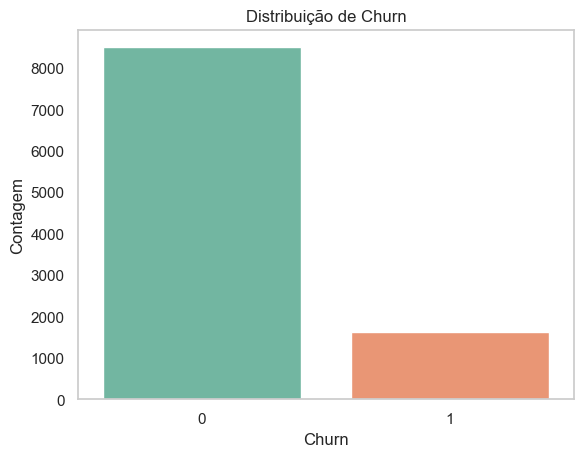

In [20]:
# Verificando a coluna alvo com plot 
sns.countplot(x="Attrition_Flag", data=data, palette='Set2')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

**Análise:** Apresentamos o gráfico de visualização da distribuição do churn, sendo essa variável a nossa principal variável alvo para o modelo de machine learning. O churn, que representa a taxa de rotatividade de clientes, é um indicador crucial para empresas em diversos setores. Este gráfico oferece uma representação visual detalhada da distribuição do churn ao longo do tempo ou em diferentes segmentos de clientes, permitindo uma análise mais aprofundada dos padrões e tendências. Além disso, essa visualização pode ser enriquecida com informações adicionais, como dados demográficos, comportamentais ou de histórico de compras, para uma compreensão mais completa dos fatores que influenciam o churn. Utilizando essa análise visual como base, nosso objetivo é desenvolver e otimizar modelos de machine learning capazes de prever e mitigar o churn, fornecendo insights valiosos para estratégias de retenção de clientes e tomadas de decisão empresariais

In [21]:
# Imporando biblioteca
from sklearn.preprocessing import LabelEncoder

# Criando o Label encoder
Label_pre = LabelEncoder()

# Transformação tipo dados
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Aplicando encoder
data[label_col]= data[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Visualizando
Label_pre

LabelEncoder()

In [22]:
# Visualizando dataset
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
# Salvnado dataset com Label Encoder
data.to_csv("dataset_LabelEncoder.csv")

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>5. </b>Modelo Redunção dimisionalidade</p></div>


A redução de dimensionalidade é uma técnica usada para reduzir o número de variáveis ou dimensões em um conjunto de dados. Isso é útil em muitos cenários, especialmente quando os conjuntos de dados são grandes e complexos. Reduzir a dimensionalidade pode ajudar a simplificar a análise, eliminar a redundância nos dados, acelerar os algoritmos de aprendizado de máquina e reduzir o risco de overfitting.

Um modelo de redução de dimensionalidade é um algoritmo ou técnica que é usado para realizar essa redução. Existem várias abordagens para a redução de dimensionalidade, cada uma com seus próprios modelos associados. Aqui estão alguns dos modelos mais comu.cia.

# Análise de Componentes Principais (PCA)

Análise de Componentes Principais (PCA): PCA é uma técnica estatística que transforma os dados em um novo conjunto de variáveis, chamadas de componentes principais, que são combinações lineares das variáveis originais. Estes componentes capturam a maior parte da variabilidade nos dados e são ordenados por sua importância.

In [24]:
# Importando biblioteca
from sklearn.decomposition import PCA

# Criando modelo
pca=PCA(n_components=2)

# Treinamento modelo
model_pca=pca.fit_transform(data)

# Visualizando 
pca

PCA(n_components=2)

In [25]:
# Criando DataFrame com resultado modelo
model=pd.DataFrame(data=model_pca,columns=['principal component 1','principal component 2'])
model.head()

,principal component 1,principal component 2
0,5850.149903,-3553.806367
1,-469.106575,-3101.456671
2,-6664.303484,-2230.729538
3,-8625.035914,-2787.043961
4,-4882.065182,-3388.096611


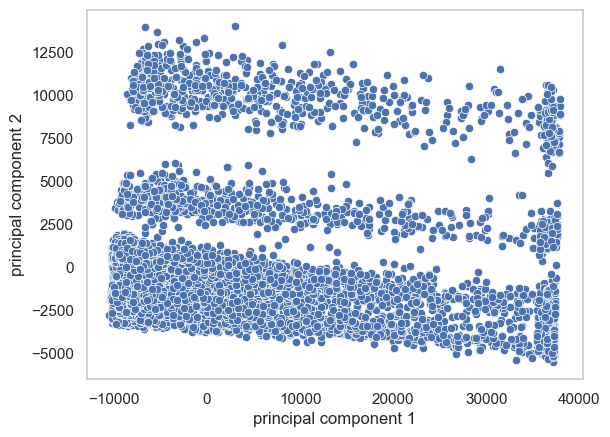

In [26]:
sns.scatterplot(x="principal component 1", y="principal component 2", data=model, palette='Set2')
plt.grid(False)
plt.show()

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>6. </b>Encontrar o valor Cluster</p></div>


## Método do Cotovelo (Elbow Method)

Neste método, o número de clusters é variado e o valor da métrica de avaliação (por exemplo, a inércia ou a soma dos quadrados das distâncias dentro dos clusters) é calculado para cada valor do número de clusters. Um gráfico é então plotado com o número de clusters no eixo x e o valor da métrica no eixo y. O ponto de inflexão no gráfico, onde a curva começa a se achatar (semelhante a um cotovelo), indica o número ideal de clusters.

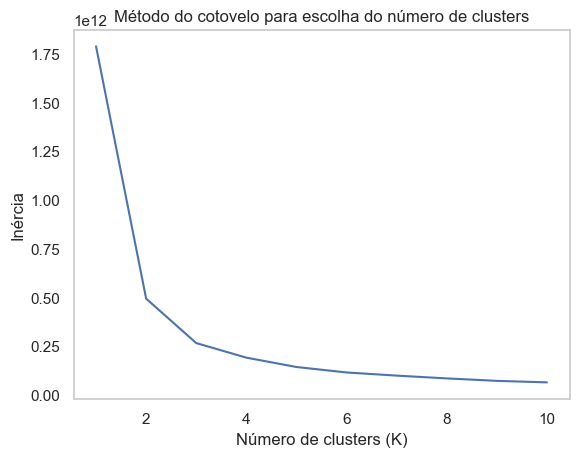

In [27]:
# Importando biblioteca
from sklearn.cluster import KMeans

# Calcular a inércia para diferentes números de clusters
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(model_pca)
    inertias.append(kmeans.inertia_)

# Plotar a curva de inércia
plt.plot(K_range, inertias)
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do cotovelo para escolha do número de clusters')
plt.grid(False)
plt.show()

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>6. </b>Modelo Kmeans</p></div>

O K-means é um dos algoritmos de clustering mais populares e amplamente utilizados em aprendizado de máquina não supervisionado. Ele é usado para particionar um conjunto de dados em K grupos (clusters) distintos, onde cada ponto de dados pertence ao cluster com o centróide mais próximo. Aqui está uma visão geral de como o algoritmo K-means funciona.

Ao utilizar o K-means, é importante escolher o número ideal de clusters, o que pode ser feito utilizando métodos como o Método do Cotovelo ou o Método da Silhueta, conforme mencionado anteriormente. Além disso, é importante normalizar os dados antes de aplicar o K-means para garantir que todas as características tenham a mesma importância no processo de clustering.

**Inicialização dos centróides:** O algoritmo começa selecionando aleatoriamente K pontos de dados como centróides iniciais, onde K é o número de clusters desejado.
    
**Atribuição dos pontos aos clusters:** Cada ponto de dados é atribuído ao cluster cujo centróide é o mais próximo (geralmente usando a distância euclidiana).
    
**Atualização dos centróides:** Uma vez que todos os pontos foram atribuídos aos clusters, os centróides de cada cluster são recalculados como a média de todos os pontos atribuídos ao cluster.

**Repetição:** Os passos 2 e 3 são repetidos até que os centróides não mudem significativamente ou até que um número máximo de iterações seja alcançado.

**Convergência:** O algoritmo converge quando os centróides não mudam significativamente entre iterações.
O algoritmo K-means tem várias aplicações, incluindo segmentação de clientes, agrupamento de documentos, compressão de imagens e detecção de anomalias.

In [28]:
# Criar modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Treinamento modelo
kmeans.fit(model_pca)

KMeans(n_clusters=5, random_state=0)

In [29]:
# centroids modelo
centroids = kmeans.cluster_centers_

In [30]:
# Adicionar os rótulos dos clusters de volta aos dados originais
data['Cluster'] = kmeans.labels_

In [31]:
# Verificar os resultados
print(data[['Customer_Age', 'Months_on_book', 'Cluster']].head())

   Customer_Age  Months_on_book  Cluster
0            45              39        4
1            49              44        4
2            51              36        0
3            40              34        0
4            40              21        0


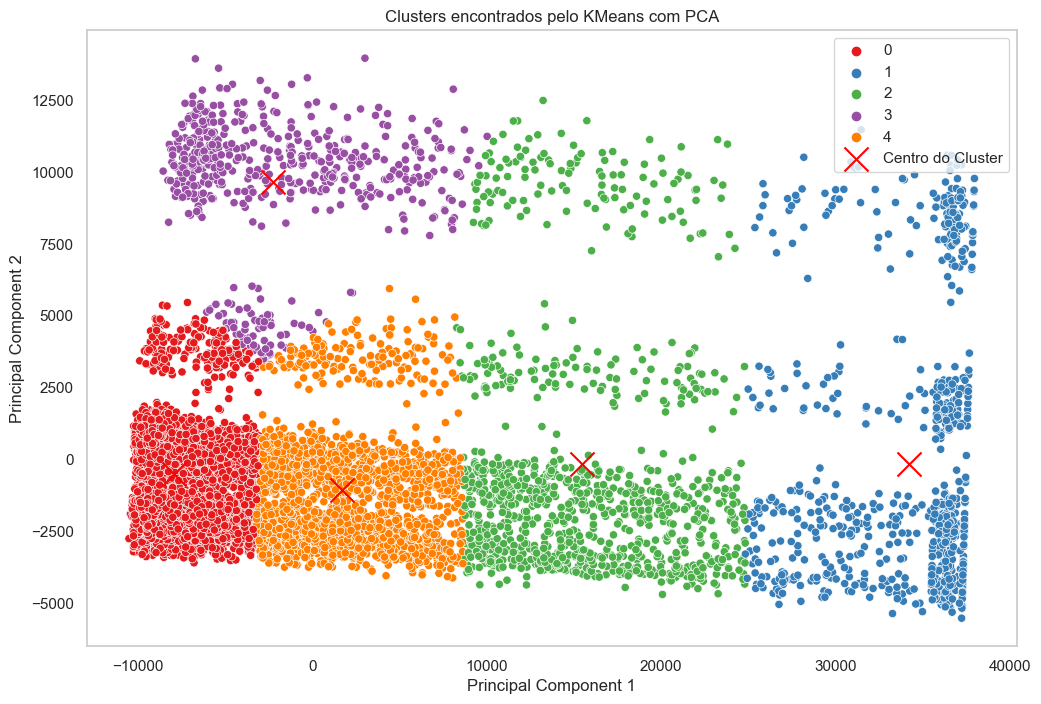

In [32]:
# Plotar os clusters com Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=model_pca[:, 0], y=model_pca[:, 1], hue=data['Cluster'], palette='Set1', legend='full')

# Plotar os centróides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=300, label='Centro do Cluster')

plt.title('Clusters encontrados pelo KMeans com PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

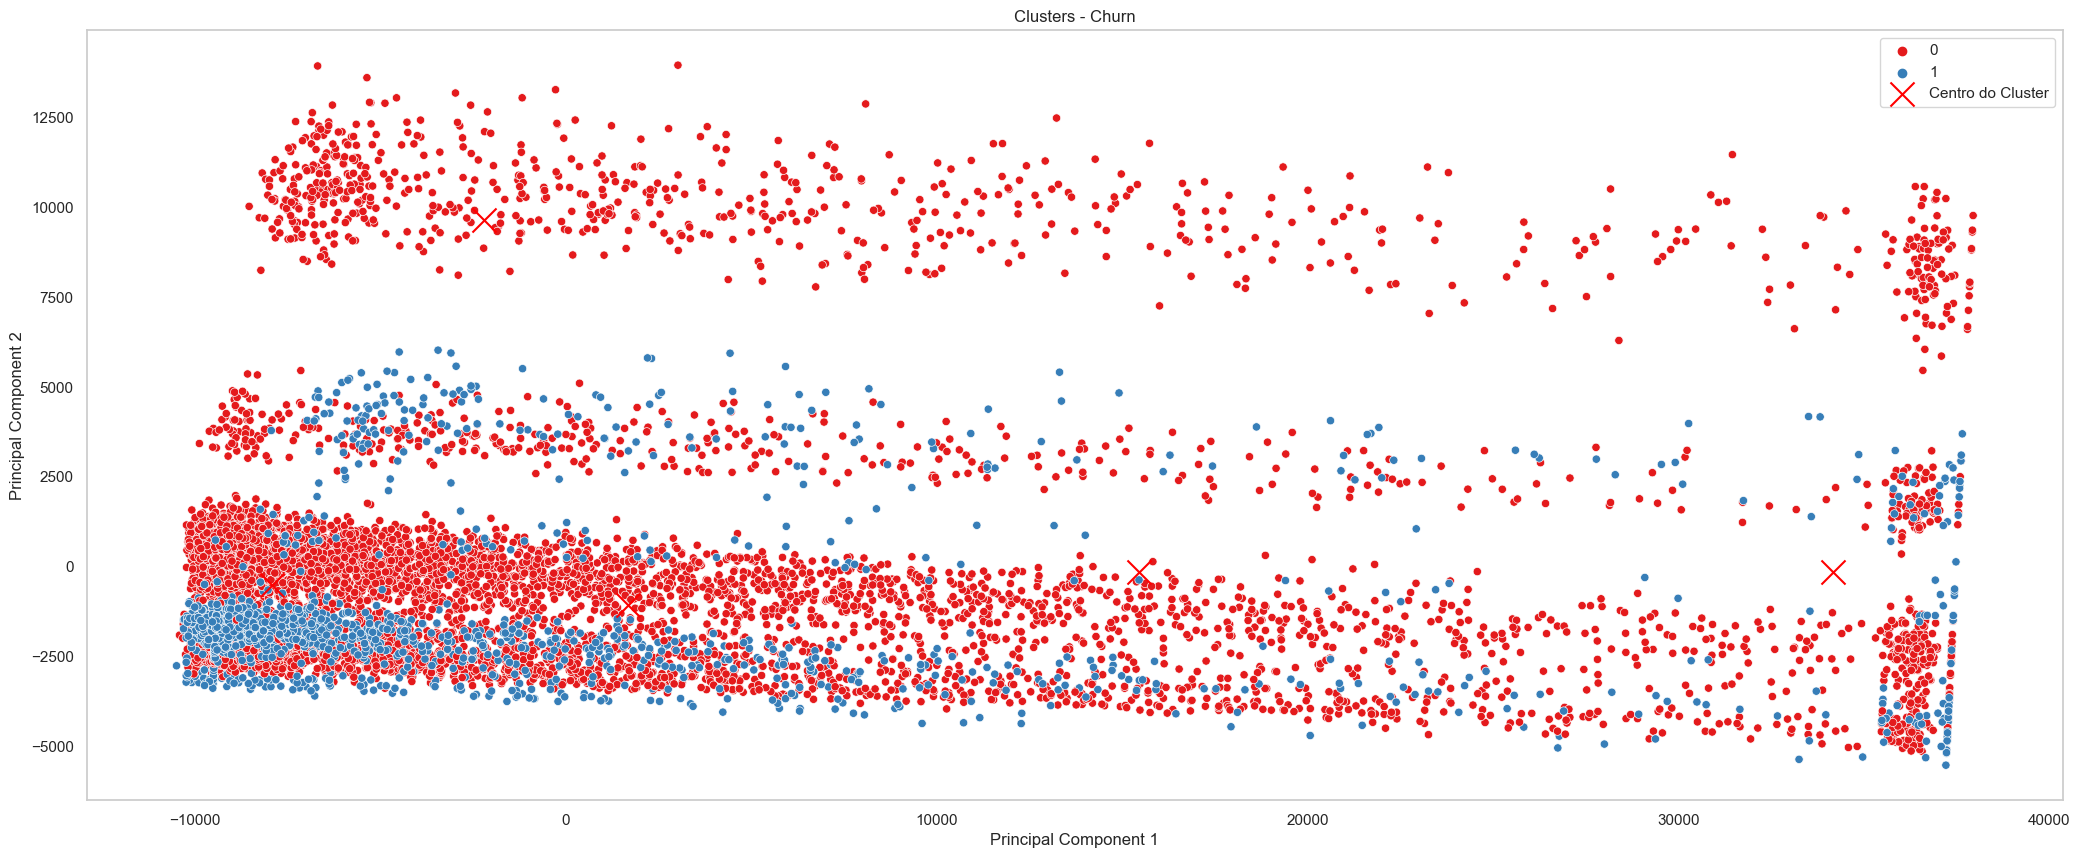

In [33]:
# Plotar os clusters com Seaborn
plt.figure(figsize=(25.5, 10))

# Plotar os clusters com Seaborn, adicionando coloração com base em 'Attrition_Flag'
sns.scatterplot(x=model_pca[:, 0], y=model_pca[:, 1], hue=data['Attrition_Flag'], palette='Set1', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=300, label='Centro do Cluster')
plt.title('Clusters - Churn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>7. </b>Distancia euclidiana</p></div>

A distância euclidiana é uma métrica de distância comumente usada em geometria para medir a distância entre dois pontos em um espaço Euclidiano. É frequentemente usada em algoritmos de aprendizado de máquina, como o K-means, para calcular a proximidade entre pontos em um conjunto de dados.

Essencialmente, a distância euclidiana é a linha reta entre os dois pontos no espaço, como se fosse a "hipotenusa" de um triângulo retângulo formado pelas diferenças de coordenadas nos eixos individuais.

A distância euclidiana é uma métrica de distância comum devido à sua simplicidade e à sua interpretação geométrica direta. Ela satisfaz as propriedades de uma métrica, como a positividade, simetria e desigualdade triangular, tornando-a adequada para muitas aplicações em ciência de dados e análise estatística.

In [34]:
# Calcular os centróides dos clusters
cluster_centers = kmeans.cluster_centers_

In [35]:
# Calcular a distância euclidiana entre os centróides de cada par de clusters
num_clusters = len(cluster_centers)
distances = np.zeros((num_clusters, num_clusters))
for i in range(num_clusters):
    for j in range(i+1, num_clusters):
        distance = np.sqrt(np.sum((cluster_centers[i] - cluster_centers[j])**2))
        distances[i][j] = distances[j][i] = distance

# Mostrar as distâncias euclidianas entre os clusters
#print("Distâncias euclidianas entre os clusters:")
#print(distances)

In [36]:
# Criar matriz de coordenadas dos clusters
cluster_coordinates = np.arange(num_clusters).reshape(-1, 1)

# Criar pares de coordenadas dos clusters para plotagem
x_coordinates = np.tile(cluster_coordinates, (1, num_clusters)).flatten()
y_coordinates = np.repeat(cluster_coordinates, num_clusters).flatten()

# Criar pares de distâncias para plotagem
distances_flat = distances.flatten()
#distances_flat

## Dendrograma dos Clusters

Um dendrograma é uma representação gráfica de uma árvore de clusters. Em análise de cluster, um dendrograma é uma ferramenta útil para visualizar a estrutura hierárquica dos clusters em um conjunto de dados. Ele mostra como os clusters estão agrupados e quais pontos de dados estão mais próximos uns dos outros.

Um dendrograma é construído a partir dos resultados de um algoritmo de agrupamento hierárquico, que agrupa os dados em uma hierarquia de clusters aninhados. Existem dois tipos principais de métodos de agrupamento hierárquico: aglomerativo e divisivo.

No método aglomerativo, cada ponto de dados começa como seu próprio cluster e, em seguida, os clusters são gradualmente mesclados até que todos os pontos de dados estejam em um único cluster. O dendrograma começa com cada ponto de dados representado por um único nó na parte inferior e, à medida que os clusters são mesclados, os nós se agrupam em níveis superiores da árvore.
    
No método divisivo, todos os pontos de dados começam no mesmo cluster e, em seguida, o cluster é dividido em clusters menores até que cada ponto de dados esteja em seu próprio cluster individual. O dendrograma começa com um único nó representando todos os pontos de dados e, à medida que os clusters são divididos, os nós se ramificam em níveis inferiores da árvore.
    
Em um dendrograma, a altura das linhas que conectam os nós representa a distância ou dissimilaridade entre os clusters que estão sendo mesclados ou divididos. Quanto maior a altura, mais diferentes são os clusters. As folhas do dendrograma representam os pontos de dados individuais e os nós internos representam os clusters ou grupos de clusters.

Dendrogramas são úteis para entender a estrutura dos dados e identificar clusters naturais, especialmente quando o número ideal de clusters não é conhecido a priori. Eles também podem ser usados para determinar um ponto de corte para definir o número final de clusters, cortando o dendrograma em um nível onde a distância entre os clusters é relativamente grande.

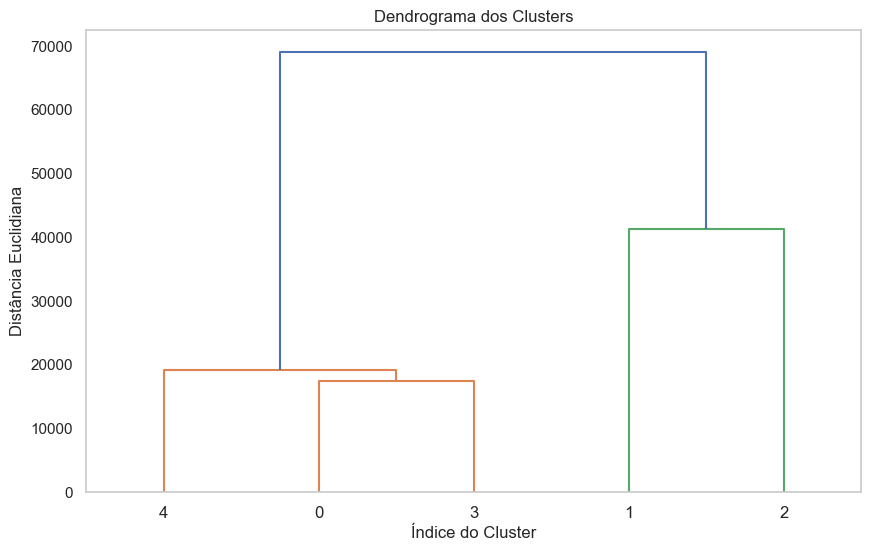

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Criar a matriz de ligação usando as distâncias euclidianas entre os clusters
linkage_matrix = linkage(distances, method='complete') 

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma dos Clusters')
plt.xlabel('Índice do Cluster')
plt.ylabel('Distância Euclidiana')
plt.grid(False)
plt.show()

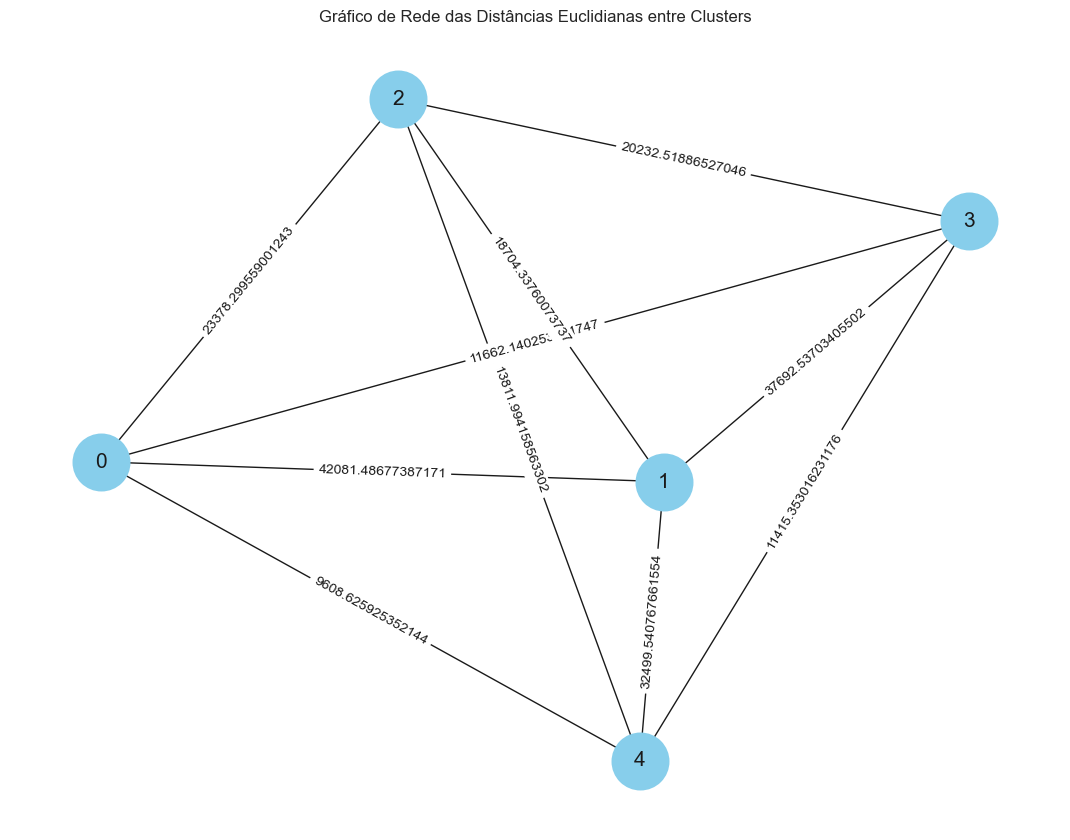

In [38]:
import networkx as nx

# Criar um gráfico de rede
G = nx.Graph()

# Adicionar os nós (clusters)
G.add_nodes_from(range(num_clusters))

# Adicionar as arestas (conexões) com as distâncias euclidianas como peso
for i in range(num_clusters):
    for j in range(i+1, num_clusters):
        G.add_edge(i, j, weight=distances[i][j])

# Plotar o gráfico de rede
plt.figure(figsize=(10.5, 8))
pos = nx.spring_layout(G)  # Layout do gráfico de rede
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=3, font_size=15)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Gráfico de Rede das Distâncias Euclidianas entre Clusters')
plt.show()

**Análise:**

Usar um gráfico de rede das distâncias euclidianas entre clusters pode ser útil por várias razões:

**1) Visualização da Estrutura de Clusterização Hierárquica:** Um gráfico de rede permite visualizar a estrutura hierárquica dos clusters e suas relações de proximidade. Isso pode ajudar a entender como os clusters estão agrupados e como eles se relacionam uns com os outros em diferentes níveis de granularidade.

**2) Identificação de Clusters Próximos e Distantes:** O gráfico de rede pode destacar quais clusters estão mais próximos uns dos outros e quais estão mais distantes, com base nas distâncias euclidianas entre eles. Isso pode fornecer insights sobre a coesão interna de cada cluster e a separação entre diferentes grupos de dados.

**3) Seleção do Número de Clusters:** Ao visualizar as distâncias entre os clusters em um gráfico de rede, pode ser mais fácil identificar um ponto de corte para determinar o número final de clusters. Por exemplo, um ponto de corte pode ser escolhido onde a distância entre os clusters é relativamente grande, indicando uma divisão clara entre grupos de dados.

**4) Compreensão da Similaridade entre Clusters:** O gráfico de rede pode mostrar a similaridade entre clusters com base em suas distâncias euclidianas. Clusters que estão mais próximos uns dos outros no gráfico de rede são mais similares em termos de padrões de dados, enquanto clusters que estão mais 
distantes são mais distintos.

**5) Exploração de Relações Não Lineares:** Em algumas situações, as relações entre clusters podem ser não lineares e complexas. Um gráfico de rede pode capturar essas relações de forma mais eficaz do que técnicas de visualização lineares, como dendrogramas.

**Usar um gráfico de rede das distâncias euclidianas entre clusters pode ajudar a compreender a estrutura e as relações entre os clusters de uma forma mais intuitiva e informativa, auxiliando na tomada de decisões durante o processo de análise de cluster.**

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>8.</b>Availiação modelo</p></div>

In [39]:
# Inércia modelo
print("Inércia do modelo K-means:", kmeans.inertia_)

Inércia do modelo K-means: 142104318592.31372


A inércia, também conhecida como soma dos quadrados dentro do cluster (Within-Cluster Sum of Squares - WCSS), é uma métrica usada para avaliar a qualidade de um modelo de clustering, como o K-means. Ela mede a dispersão dos pontos dentro de cada cluster.

Em termos simples, a inércia representa a soma das distâncias quadráticas de cada ponto dentro de um cluster até o centróide desse cluster. Quanto menor a inércia, mais compactos e bem definidos são os clusters.

Durante a execução do algoritmo K-means, o objetivo é minimizar a inércia, ou seja, encontrar centróides de clusters de forma que a soma das distâncias quadráticas de todos os pontos dentro de cada cluster até o seu centróide seja minimizada.

A inércia é uma métrica interna de avaliação do modelo, o que significa que ela é calculada apenas com base nos dados e não requer rótulos de classe conhecidos. No entanto, é importante notar que a inércia pode ser influenciada pelo número de clusters escolhido. Geralmente, a inércia diminui à medida que o número de clusters aumenta, pois os clusters se tornam mais compactos. No entanto, o objetivo é encontrar um equilíbrio entre a redução da inércia e o número de clusters, evitando tanto clusters muito grandes quanto clusters muito pequenos.

Assim, ao ajustar o modelo K-means, é comum plotar um gráfico da inércia em função do número de clusters e utilizar métodos como o Método do Cotovelo para determinar o número ideal de clusters, aquele em que a redução da inércia começa a diminuir significativamente. Isso ajuda a encontrar um ponto ideal que equilibra a compacidade dos clusters e a parcimônia do número de clusters.

**Análise:** Aqui vemos que o modelo K-Means teve uma inecia de 14.313 dentro dos clusters. A inércia do modelo K-means, que você forneceu, é 142104318592.31372. Essa é uma medida da soma dos quadrados dentro do cluster (WCSS), que indica a dispersão dos pontos dentro dos clusters.

In [40]:
from sklearn.metrics import silhouette_score
print("Silhouette score modelo", silhouette_score(model_pca, kmeans.labels_))

Silhouette score modelo 0.5858263597697208


O Silhouette Score é uma métrica de avaliação da qualidade dos clusters em técnicas de clustering, como o K-means. Ele mede o quão bem os pontos de um cluster estão agrupados em comparação com o quão dispersos estão em relação aos outros clusters. Em essência, o Silhouette Score fornece uma medida de quão bem separados estão os clusters a pontuação do Silhouette varia de -1 a 1, onde:

**1)** Um valor próximo de +1 indica que a amostra está longe dos clusters vizinhos, o que indica que ela está bem ajustada ao seu próprio cluster.

**2)** Um valor de 0 indica que a amostra está próxima da fronteira de decisão entre dois clusters.

**3)** Um valor próximo de -1 indica que a amostra pode ter sido atribuída ao cluster errado.

Em geral, quanto maior o valor do Silhouette Score, melhor é a qualidade do clustering. No entanto, é importante notar que o Silhouette Score sozinho não é suficiente para determinar a melhor configuração de clustering. Deve ser usado em conjunto com outras métricas e técnicas de avaliação, como a inércia, interpretabilidade dos clusters e validação externa, para uma avaliação completa e precisa do modelo de clustering.

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>9.</b>Métrica modelo</p></div>

In [41]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(model_pca, kmeans.labels_)
print("Davies bouldin score modelo:", dbi)

Davies bouldin score modelo: 0.6432994649676216


**Davies bouldin score**

O Davies-Bouldin Score é outra métrica de avaliação da qualidade dos clusters em algoritmos de clustering, como o K-means. Ele mede a similaridade média entre cada cluster e seu cluster mais similar, levando em consideração a dispersão dentro dos clusters e a separação entre os clusters.

Para calcular o Davies-Bouldin Score, são realizados os seguintes passos:

**1)** Para cada cluster, calcula-se a dispersão média dos pontos dentro do cluster.

**2)** Para cada par de clusters, calcula-se a similaridade entre eles. Isso é feito comparando a distância média entre os pontos dos clusters com a 
distância entre os centróides dos clusters.

**3)** O Davies-Bouldin Score é calculado como a média do máximo dos valores de similaridade para cada cluster.


Em geral, quanto menor o valor do Davies-Bouldin Score, melhor é a qualidade do clustering. Um valor de 0 indica que os clusters estão bem separados e com uma dispersão mínima dentro deles. No entanto, assim como com o Silhouette Score, o Davies-Bouldin Score deve ser usado em conjunto com outras métricas e técnicas de avaliação para uma análise completa e precisa do modelo de clustering.

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>10.</b>Salvando modelo</p></div>

In [42]:
# Importando bilioteca

import pickle

# Salvando o modelo K-means em um arquivo
with open('modelo_kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>11.</b>Conclusão</p></div>

Neste projeto abrangente, nosso objetivo principal foi desenvolver e implementar um modelo de clusterização robusto para investigar e compreender o fenômeno do churn em um contexto empresarial específico. Reconhecendo a importância crítica do churn para a saúde e o sucesso de uma empresa, especialmente em setores altamente competitivos e orientados para o cliente, como telecomunicações, serviços de assinatura e comércio eletrônico, dedicamos esforços significativos para criar uma solução analítica eficaz. Inicialmente, conduzimos uma análise exploratória extensiva dos dados disponíveis, incluindo variáveis relevantes relacionadas aos clientes, comportamentos de consumo, transações e históricos de churn. Essa etapa nos permitiu obter uma compreensão sólida do cenário atual e identificar padrões preliminares nos dados.

Em seguida, aplicamos técnicas avançadas de modelagem de clusterização, com foco no algoritmo K-means devido à sua eficácia comprovada e escalabilidade para grandes conjuntos de dados. Através do processo iterativo de ajuste do modelo e validação cruzada, determinamos o número ideal de clusters que melhor representavam a estrutura subjacente dos dados. Com base nessa análise, identificamos distintamente os clusters 1 e 2 como os mais proeminentes em termos de ocorrências de churn, sinalizando uma área crítica para investigação adicional e intervenção estratégica. Além disso, aproveitamos o poder do método de grafos para visualizar e analisar as distâncias euclidianas entre os clusters. Ao mapear essas relações, pudemos identificar não apenas a dissimilaridade entre os grupos de clientes, mas também insights valiosos sobre a interconectividade e a proximidade entre os clusters. Surpreendentemente, constatamos que os clusters 1 e 2 apresentaram distâncias substanciais em relação aos demais, indicando uma segmentação clara e distintiva dentro da base de clientes.

Por fim, ao integrar os resultados da clusterização com outras fontes de dados e análises, como análise de tendências temporais, comportamentais e demográficas, pudemos enriquecer ainda mais nossa compreensão do churn e desenvolver estratégias de retenção de clientes mais direcionadas e eficazes.

Essa abordagem holística e baseada em dados para a análise de churn não apenas proporcionou insights valiosos sobre os padrões de comportamento do cliente, mas também capacitou a empresa a tomar decisões informadas e estratégicas para mitigar o churn, melhorar a satisfação do cliente e impulsionar o crescimento sustentável do negócio.